In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


from sklearn import metrics
import seaborn as sns

In [3]:

data_df = pd.read_csv('/content/creditcard.csv') 



In [4]:
data_df .head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data_df .shape

(284807, 31)

In [6]:
data_df[['Amount', 'Time', 'Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [7]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data_df.isna().any

<bound method DataFrame.any of          Time     V1     V2     V3     V4  ...    V26    V27    V28  Amount  Class
0       False  False  False  False  False  ...  False  False  False   False  False
1       False  False  False  False  False  ...  False  False  False   False  False
2       False  False  False  False  False  ...  False  False  False   False  False
3       False  False  False  False  False  ...  False  False  False   False  False
4       False  False  False  False  False  ...  False  False  False   False  False
...       ...    ...    ...    ...    ...  ...    ...    ...    ...     ...    ...
284802  False  False  False  False  False  ...  False  False  False   False  False
284803  False  False  False  False  False  ...  False  False  False   False  False
284804  False  False  False  False  False  ...  False  False  False   False  False
284805  False  False  False  False  False  ...  False  False  False   False  False
284806  False  False  False  False  False  ...  False  F

In [9]:
null_columns = pd.DataFrame({'Colummns':data_df.isna().sum().index, 'null values':data_df.  isna().sum().values ,'Percentage':data_df.isna().sum().values/data_df.shape[0]})

In [10]:
null_columns

,Colummns,null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [11]:
data_df["Class"].tail(10) 

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

In [12]:
nfcount=0
notFraud=data_df['Class']
for i in range(len(notFraud)):
  if notFraud[i]==0:
    nfcount=nfcount+1

nfcount
per_nf=(nfcount/len(notFraud))*100
print('Percentage of total not fraud transaction in the dataset:',per_nf) 


Percentage of total not fraud transaction in the dataset: 99.82725143693798


In [13]:
fcount=0
Fraud=data_df['Class']
for i in range(len(Fraud)):
  if Fraud[i]==1:
    fcount=fcount+1

fcount
per_f=(fcount/len(Fraud))*100
print('Percentage of total fraud transaction in the dataset:',per_f) 


Percentage of total fraud transaction in the dataset: 0.1727485630620034


In [14]:
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=Fraud
plot_data['Genuine Transaction']=notFraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


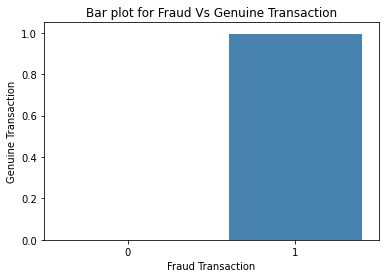

In [15]:
plt.title("Bar plot for Fraud Vs Genuine Transaction")
sns.barplot(x='Fraud Transaction', y= 'Genuine Transaction', data=plot_data , palette = 'Blues', edgecolor='w')


Text(0.5, 1.0, 'Time Vs Amount')

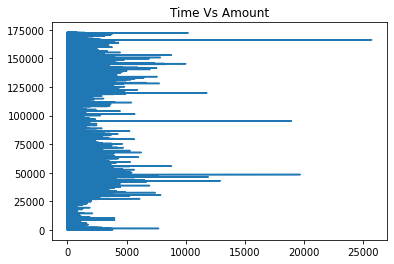

In [16]:
x=data_df['Amount']
y=data_df['Time']
plt.plot(x,y)
plt.title('Time Vs Amount')
#sns.barplot(X=x, Y=y, data=data, palette = 'Blues', edgecolor='w)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


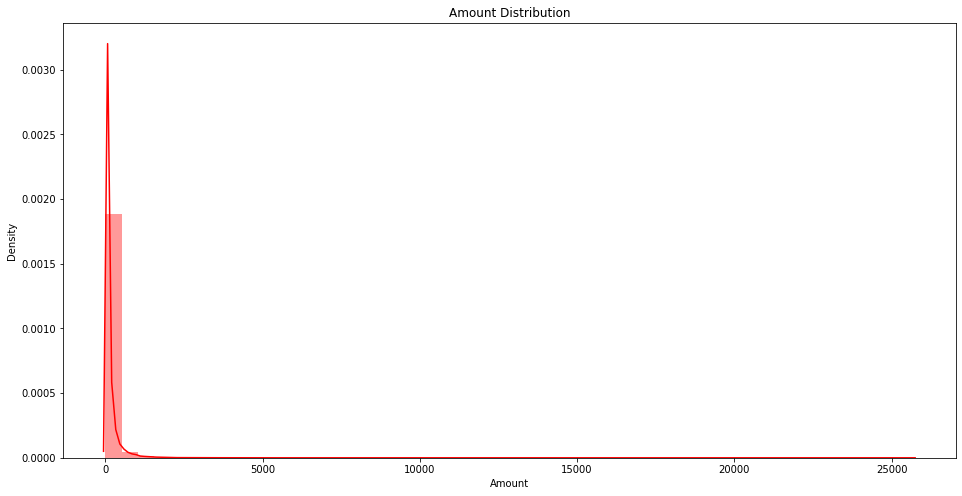

In [17]:
plt.figure(figsize=(16,8))
plt.title('Amount Distribution')
sns.distplot(data_df['Amount'], color='red');

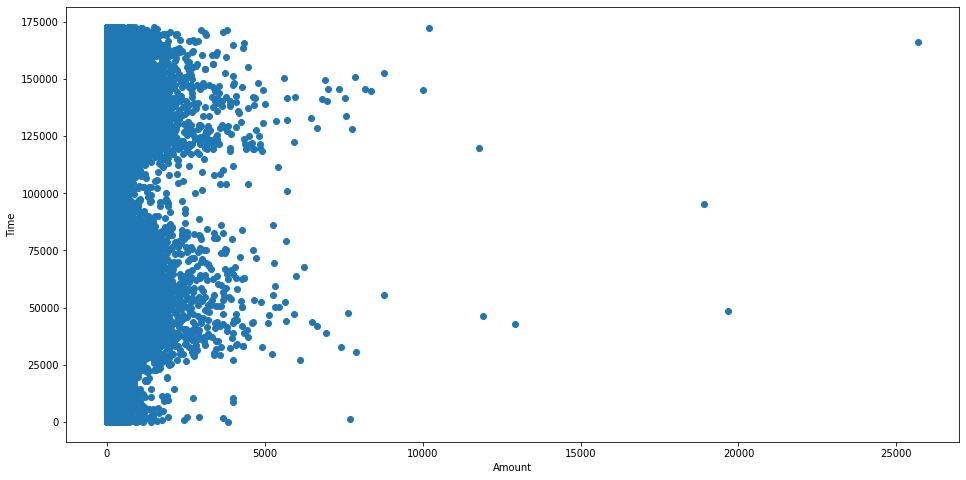

In [18]:
fig, ax= plt.subplots(figsize=(16,8))
ax.scatter(data_df['Amount'], data_df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

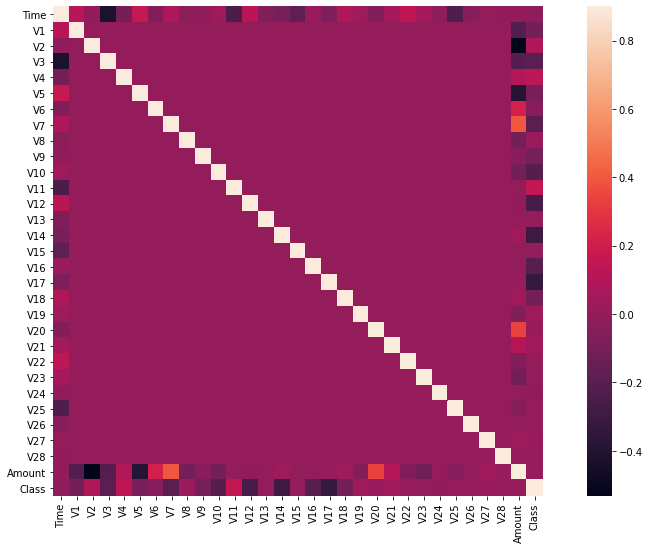

In [19]:
correlation_metrics = data_df .corr()
fig = plt.figure(figsize=(16,9))
sns.heatmap(correlation_metrics, vmax = 0.9, square = True)
plt.show()

In [20]:

x=data_df.drop(['Class'], axis = 1)
y=data_df['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)



In [21]:
logisticreg = LogisticRegression()
logisticreg.fit (xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
  y_pred = logisticreg.predict(xtest)
  accuracy=logisticreg.score(xtest,ytest)

In [23]:
cm= metrics.confusion_matrix(ytest ,y_pred )
print (cm)

[[56829    35]
 [   43    55]]


In [24]:
print('Accuracy score of the Logistic regression model: ', accuracy*100, '%')


Accuracy score of the Logistic regression model:  99.86306660580738 %
